In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from matplotlib import style

In [2]:
df=pd.read_csv('/content/cars.csv')

In [3]:
df

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,2003 Holden Commodore Executive VY,4499,Holden,Commodore,Executive,VY,2003,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5
17044,12852460,2008 Toyota Yaris YR NCP90R,4999,Toyota,Yaris,YR,NCP90R,2008,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5
17045,12852462,2002 Holden Jackaroo SE LWB (4X4) U8,7999,Holden,Jackaroo,SE LWB (4X4),U8,2002,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7
17046,12852463,2016 Hyundai I30 Active GD4 Series 2,14000,Hyundai,I30,Active,GD4 Series 2,2016,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [5]:
df.describe()

,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


##**Viewing outliers**

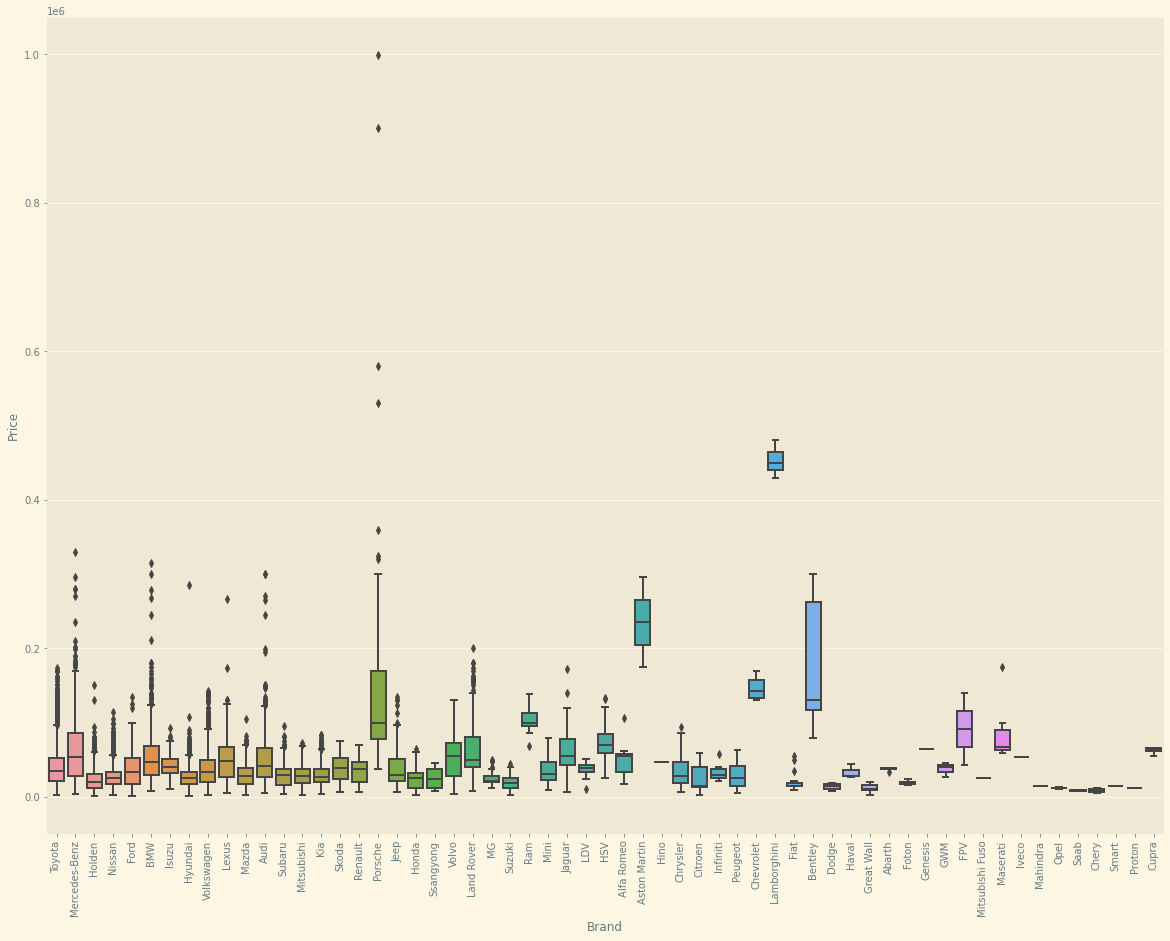

In [7]:
fig, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
ax = sns.boxplot(x='Brand', y='Price', data=df, )

##**The most popular car brands**

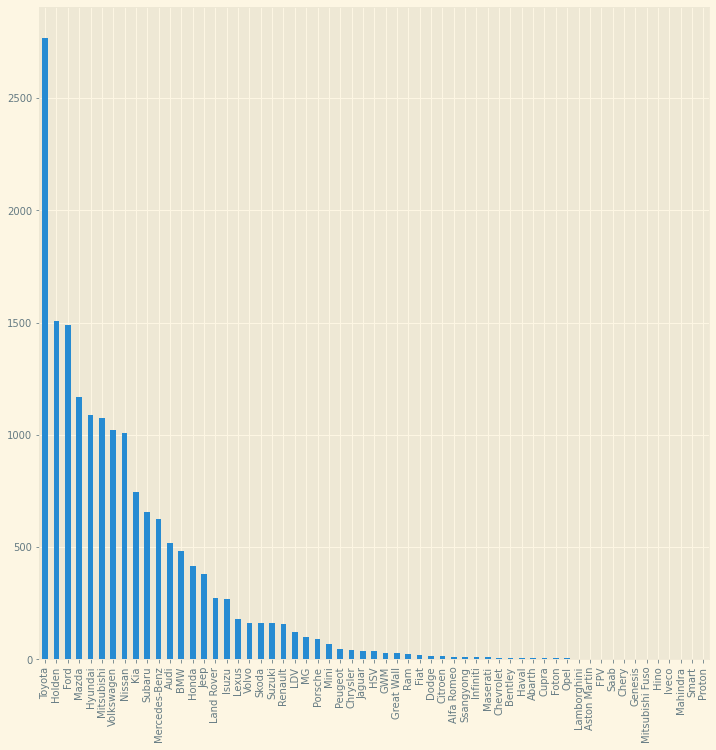

In [8]:
df['Brand'].value_counts().plot(kind='bar', figsize=(12,12))
plt.show()

##**Number of car models of different brands**

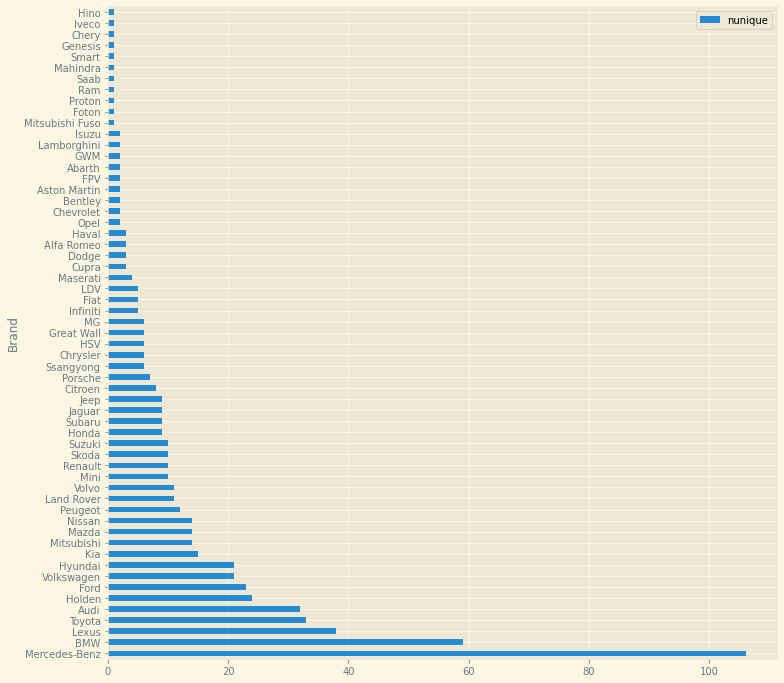

In [9]:
df.groupby('Brand')['Model'].agg(['nunique']).sort_values(by='nunique',ascending=False).plot(kind='barh', figsize=(12,12))
plt.show()

##**Most popular Types**

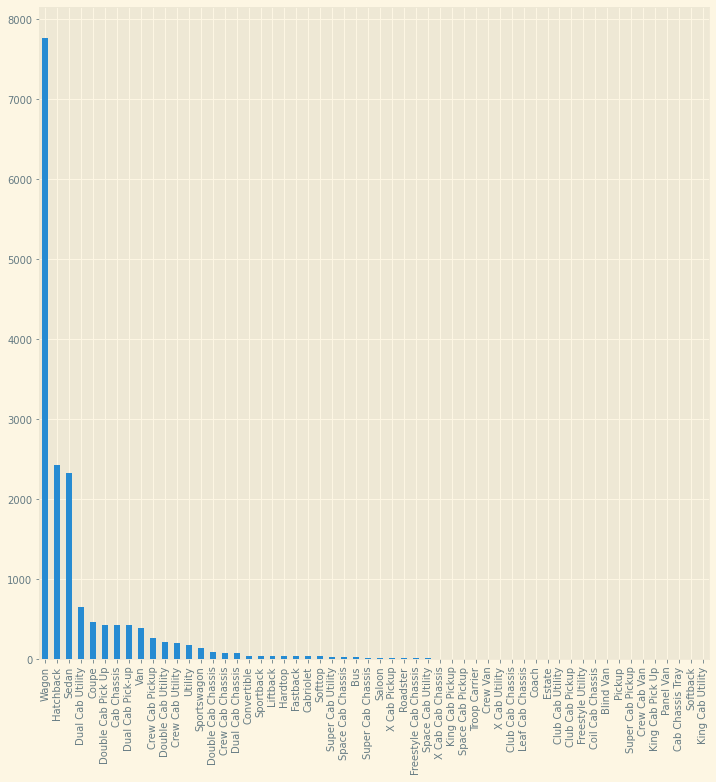

In [10]:
df['Type'].value_counts().plot(kind='bar', figsize=(12,12))
plt.show()

##**Distribution by fuel**

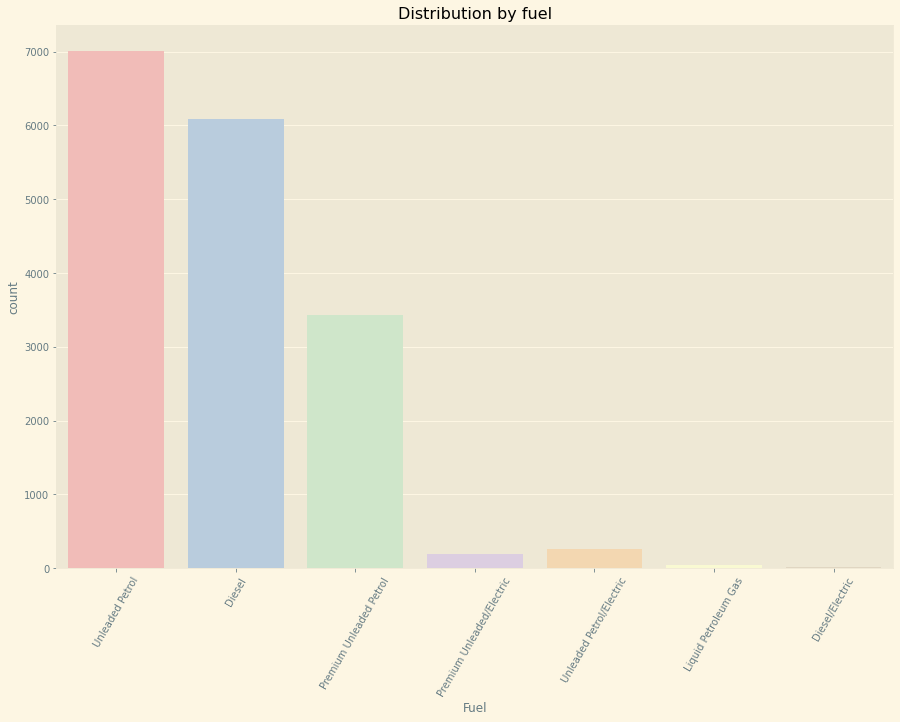

In [11]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.countplot(data=df,x='Fuel',palette='Pastel1').set(title='Distribution by fuel')
plt.show()

##**Distribution by Gearbox**

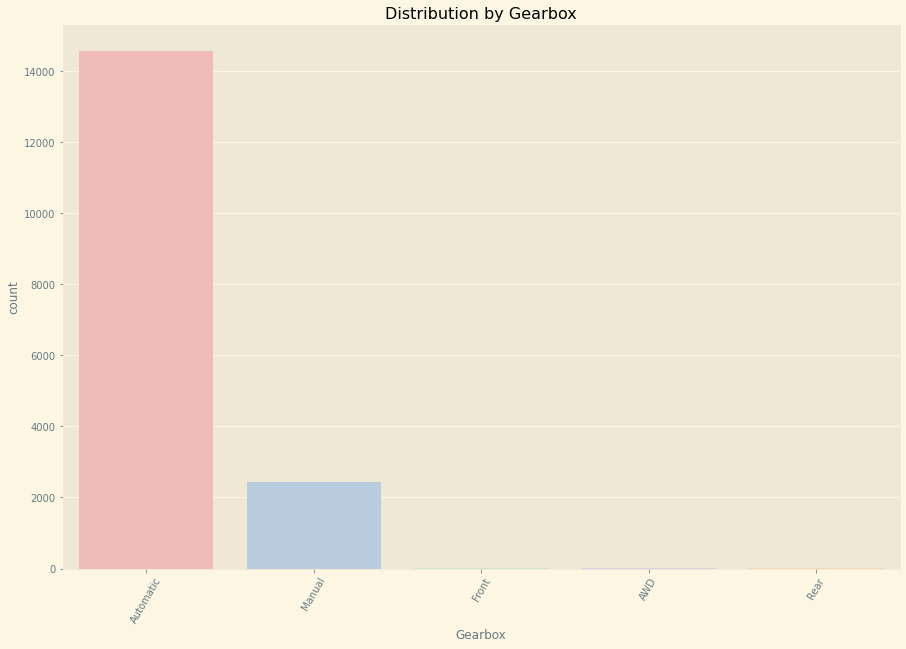

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.countplot(data=df,x='Gearbox',palette='Pastel1').set(title='Distribution by Gearbox')
plt.show()

##**Distribution by Status**

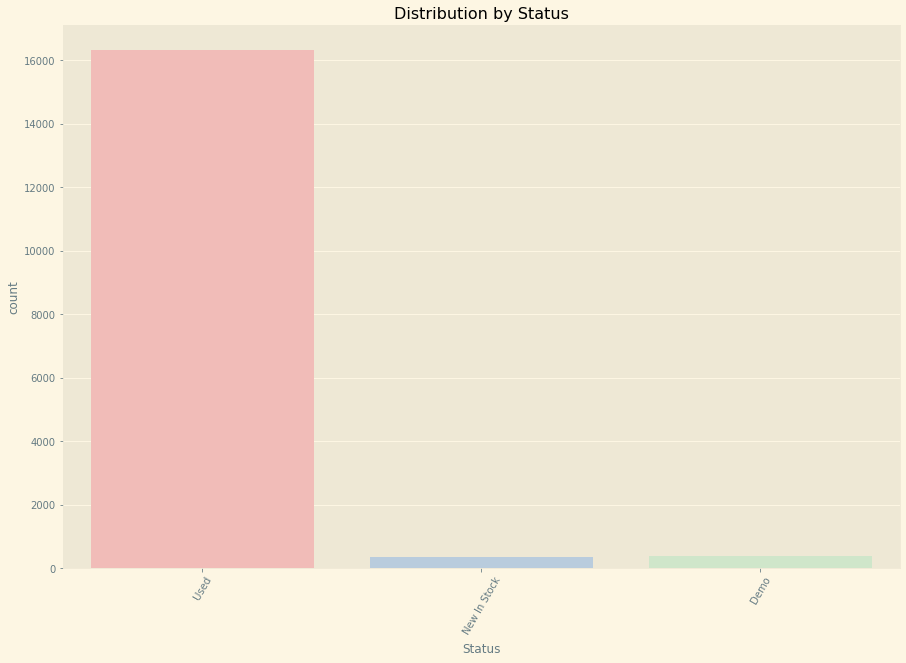

In [13]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.countplot(data=df,x='Status',palette='Pastel1').set(title='Distribution by Status')
plt.show()

##**Price on the brand**

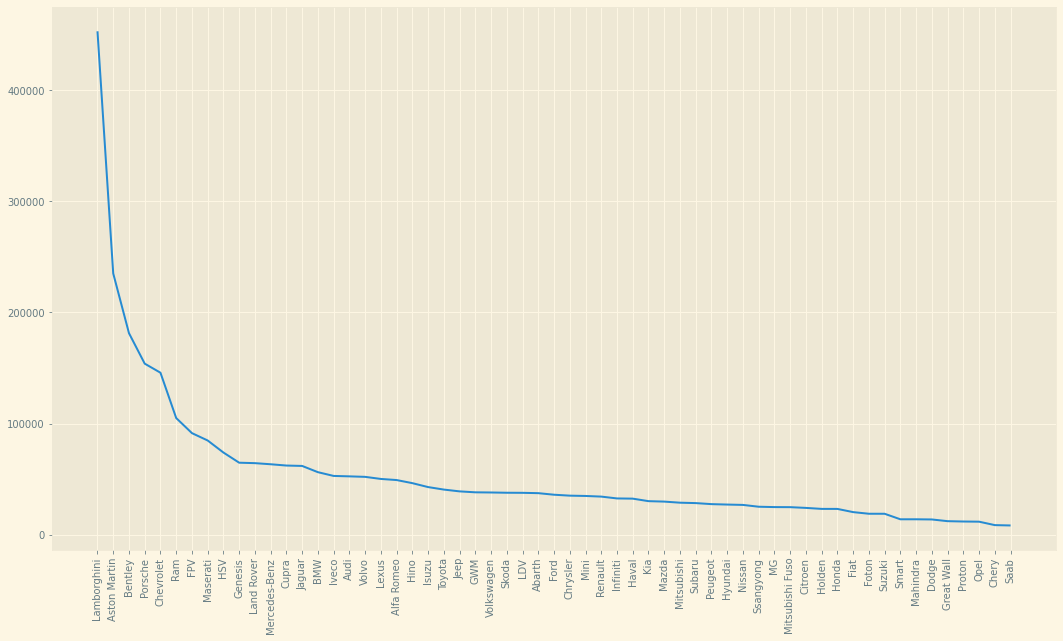

In [14]:
BrandPrice = df.groupby(['Brand'])['Price'].mean().reset_index().sort_values(by='Price',ascending=False)

plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
plt.plot(BrandPrice['Brand'],BrandPrice['Price'])
plt.show()

##**Price relative to the year**

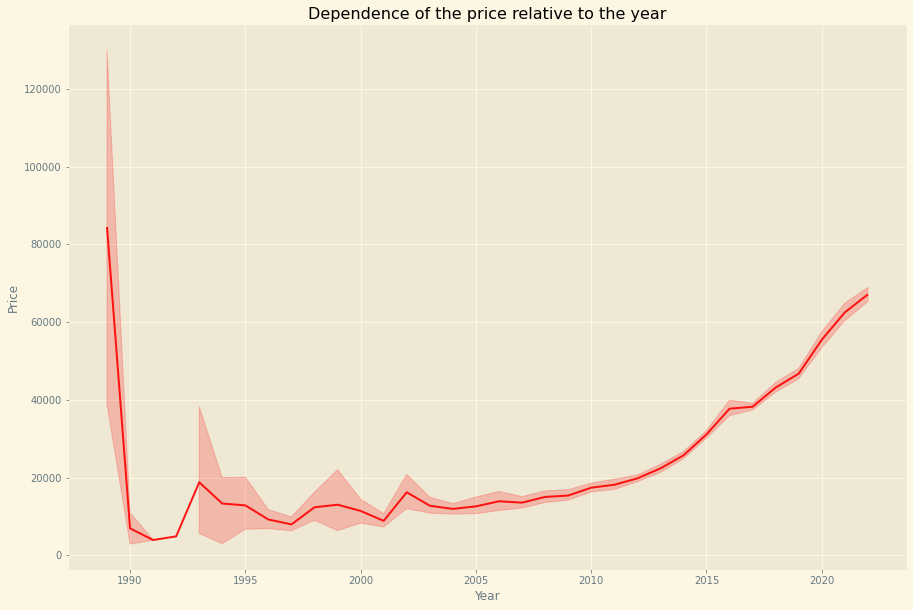

In [15]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Year', y='Price', color='r', alpha=0.9).set(title = 'Dependence of the price relative to the year')
plt.show()


##**The dependence of the price of the car relative to the brand in different years**

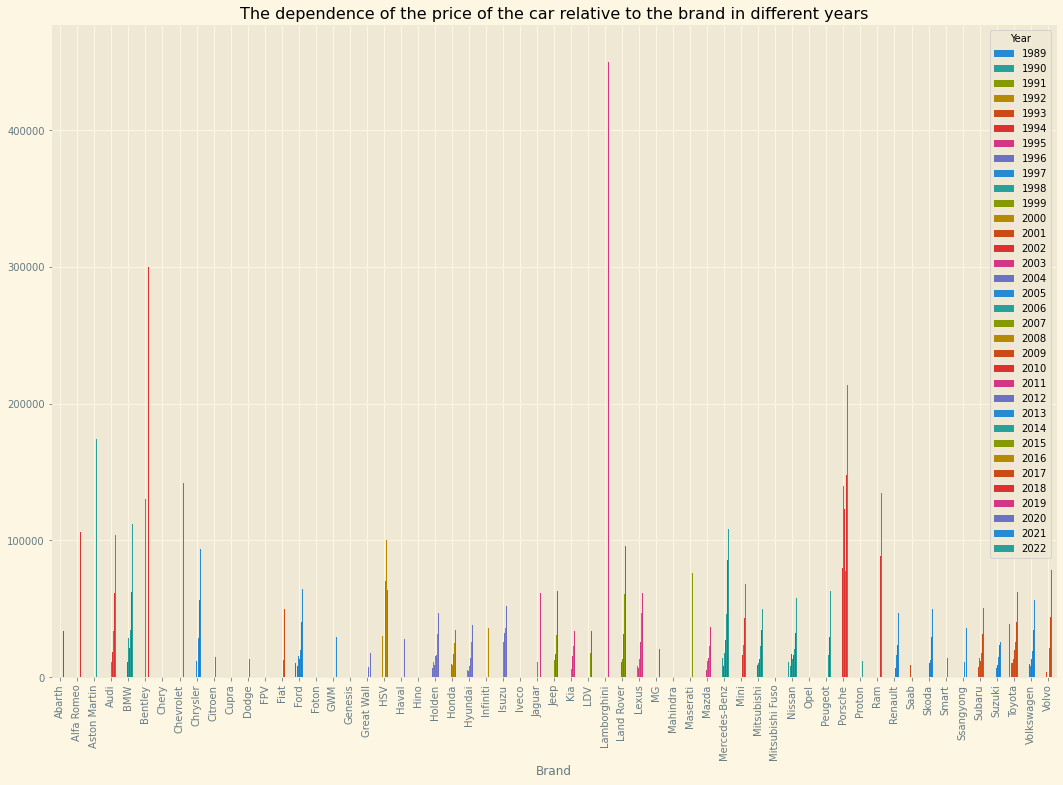

In [16]:
df.pivot_table(index='Brand', columns='Year', values='Price').plot(kind='bar', figsize=(18,12)).set(title = 'The dependence of the price of the car relative to the brand in different years') 
plt.show()

##**Correlations**

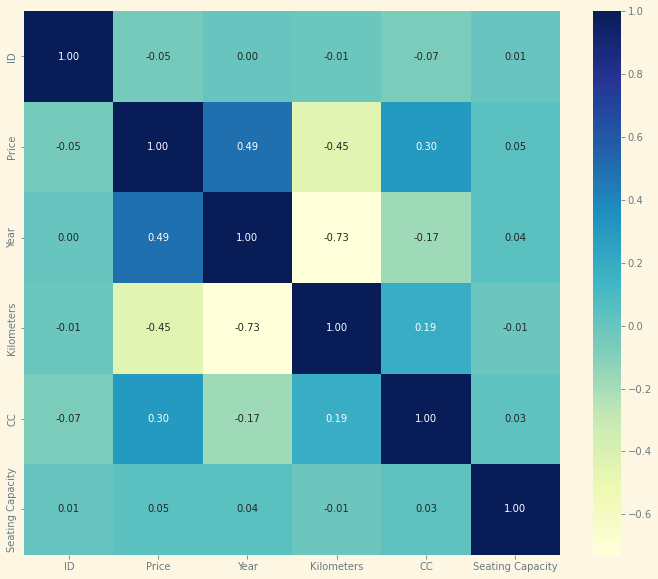

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')
plt.show()

##**Prediction**

In [18]:
df2=df.copy()
df2['Name']=pd.factorize(df2.Name)[0]
df2['Brand']=pd.factorize(df2.Brand)[0]
df2['Model']=pd.factorize(df2.Model)[0]
df2['Variant']=pd.factorize(df2.Variant)[0]
df2['Series']=pd.factorize(df2.Series)[0]
df2['Type']=pd.factorize(df2.Type)[0]
df2['Gearbox']=pd.factorize(df2.Gearbox)[0]
df2['Fuel']=pd.factorize(df2.Fuel)[0]
df2['Status']=pd.factorize(df2.Status)[0]
df2['Color']=pd.factorize(df2.Color)[0]

In [19]:
df2

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,0,9999,0,0,0,0,2010,263000,0,0,0,0,2362,0,5
1,12190570,1,117990,1,1,1,1,2021,19,0,0,1,1,2143,1,7
2,12321855,2,79990,1,2,2,1,2021,24,0,0,1,1,2143,1,8
3,12346971,3,34990,1,3,3,2,2010,120579,1,0,1,0,2143,1,4
4,12363884,4,15990,2,4,4,3,2016,72506,2,0,0,0,1796,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17043,12852453,7580,4499,2,9,87,687,2003,230441,3,0,0,0,3791,9,5
17044,12852460,4737,4999,0,96,475,1178,2008,237113,5,1,0,0,1299,27,5
17045,12852462,8573,7999,2,512,2136,1766,2002,238768,0,0,1,0,2999,9,7
17046,12852463,3127,14000,7,14,12,1198,2016,49800,5,1,0,0,1797,3,5


In [20]:
X= df2.values[:,0:16]
Y= df2.values[:, 2]


In [21]:
X= preprocessing.scale(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 100)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor()


In [24]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
score = rfr.score(X_train,y_train)
score

0.9973528760843545

In [26]:
y_pred5 = rfr.predict(X_test)
rscore=r2_score(y_test, y_pred5)
rscore

0.980678928687039

In [27]:
df2['Prediction']=rfr.predict(X)

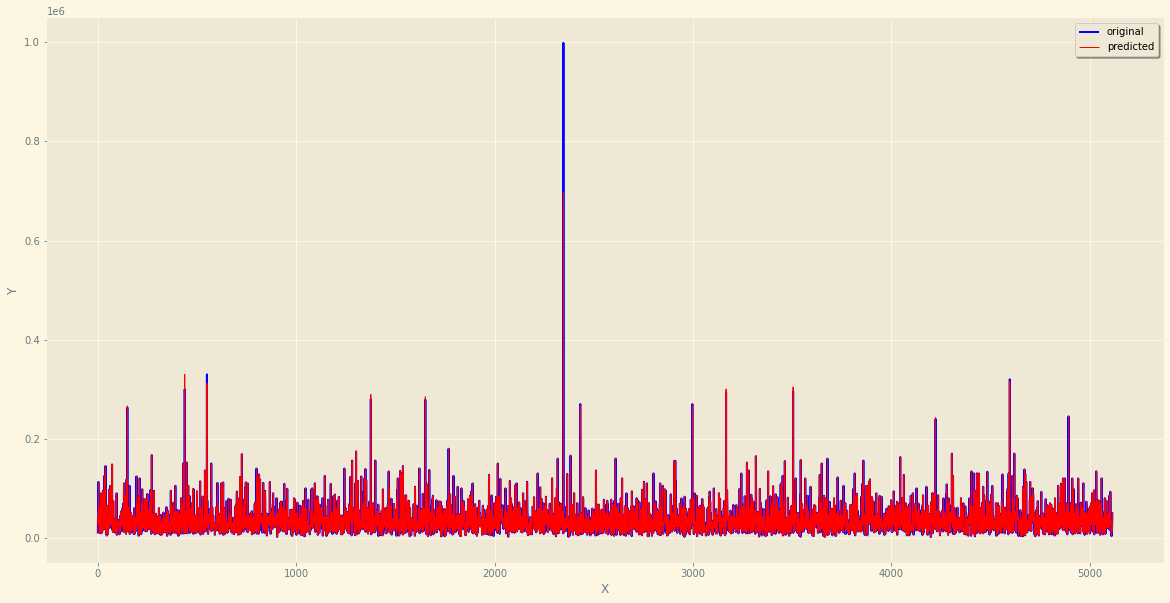

In [28]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, linewidth = '2', label='original', color = 'b')
plt.plot(x_ax, y_pred5, linewidth = '1', label='predicted', color = 'r')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right',fancybox=True, shadow=True)
plt.show() 